In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/FUlyankin/ML_for_marketing/master/drafts/sem9_clasters/hw6/checkins.csv

--2023-12-19 16:44:28--  https://raw.githubusercontent.com/FUlyankin/ML_for_marketing/master/drafts/sem9_clasters/hw6/checkins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28779325 (27M) [text/plain]
Saving to: ‘checkins.csv’

checkins.csv        100%[===================>]  27.45M   166MB/s    in 0.2s    

2023-12-19 16:44:28 (166 MB/s) - ‘checkins.csv’ saved [28779325/28779325]



In [3]:
df = pd.read_csv('checkins.csv')
print('Размер выборки:', df.shape)
df.head()

Размер выборки: (396634, 6)


,id,user_id,venue_id,latitude,longitude,created_at
0,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
1,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
2,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
3,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
4,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18


In [4]:
X_adv = df[['longitude', 'latitude']].sample(100000).values
X_adv

array([[ -74.001437 ,   40.715972 ],
       [ -73.9884556,   40.7329606],
       [ -84.2963123,   33.7748275],
       ...,
       [-111.6585337,   40.2338438],
       [ -74.1023416,   40.5779485],
       [-117.078863 ,   32.981212 ]])

In [5]:
offices = np.array([[-118.188740, 33.751277],[-80.324116, 25.867736], [-0.075479, 51.503016],
                  [4.885084, 52.378894], [117.036146, 39.366487], [151.205134, -33.868457]])

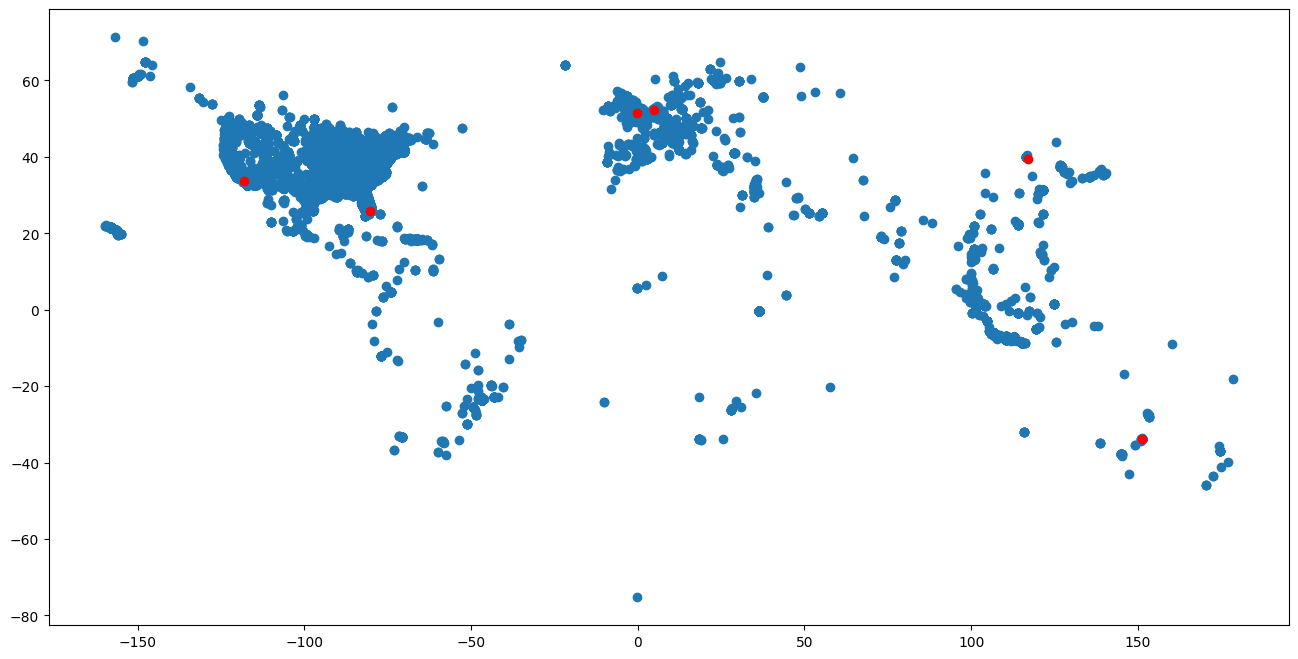

In [6]:
plt.figure(figsize=(16,8))
plt.scatter(X_adv[:,0], X_adv[:,1])
plt.scatter(offices[:,0], offices[:,1], color='red')

In [7]:
# Алгоритм K-средних

from sklearn.cluster import KMeans

np.random.seed(123)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))
y = np.array([1]*100 + [2]*100 + [3]*100)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


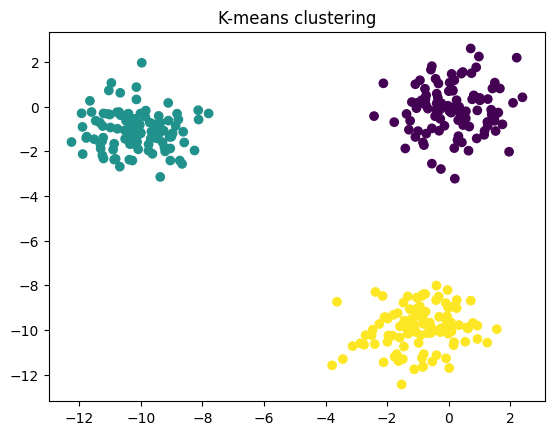

In [8]:
k_means = KMeans(n_clusters = 3)
k_means = k_means.fit(X)
clusters = k_means.predict(X)

plt.scatter(X[:,0], X[:,1], c = clusters)
plt.title('K-means clustering');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

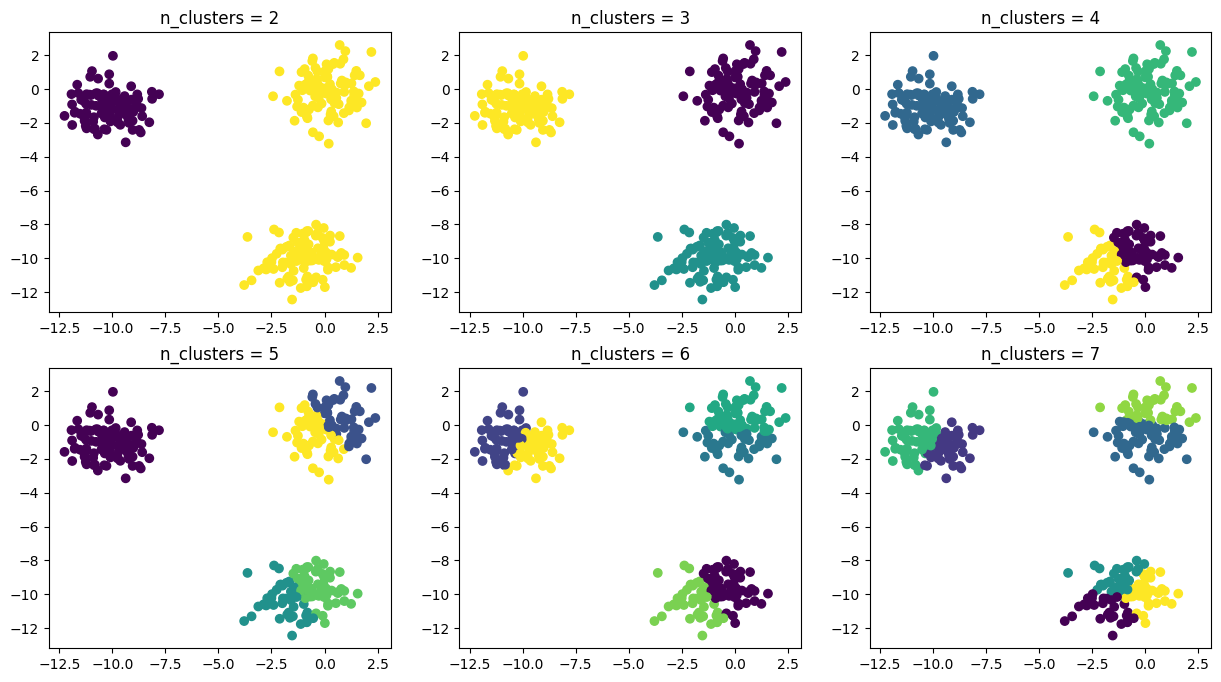

In [9]:
plt.figure(figsize= (15,8))
for n_c in range(2,8):
    k_means = KMeans(n_clusters = n_c)
    k_means = k_means.fit(X)
    clusters = k_means.predict(X)
    plt.subplot(2,3, n_c - 1)
    plt.scatter(X[:,0], X[:,1], c = clusters)
    plt.title('n_clusters = {}'.format(n_c))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

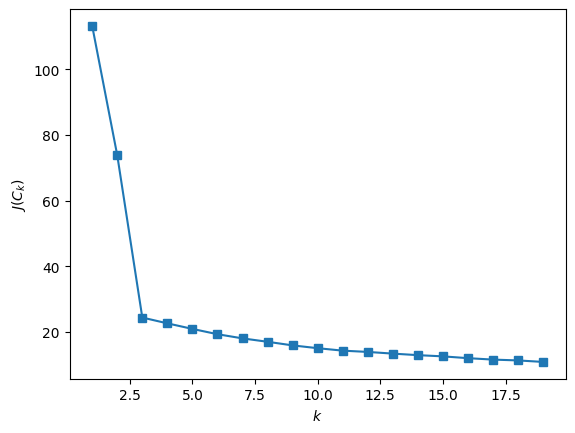

In [10]:
from sklearn import metrics
from scipy.spatial.distance import cdist

rg = range(1, 20)
inertia = []
for k in rg:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(rg, inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [14]:
# Пробуем запустить алгоритм с 50 кластерами

%%time
from sklearn.cluster import KMeans
kmeanModel = KMeans(n_clusters=50)
kmeanModel.fit(X_adv)

centers = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: user 5.66 s, sys: 2.32 s, total: 7.98 s
Wall time: 7.78 s


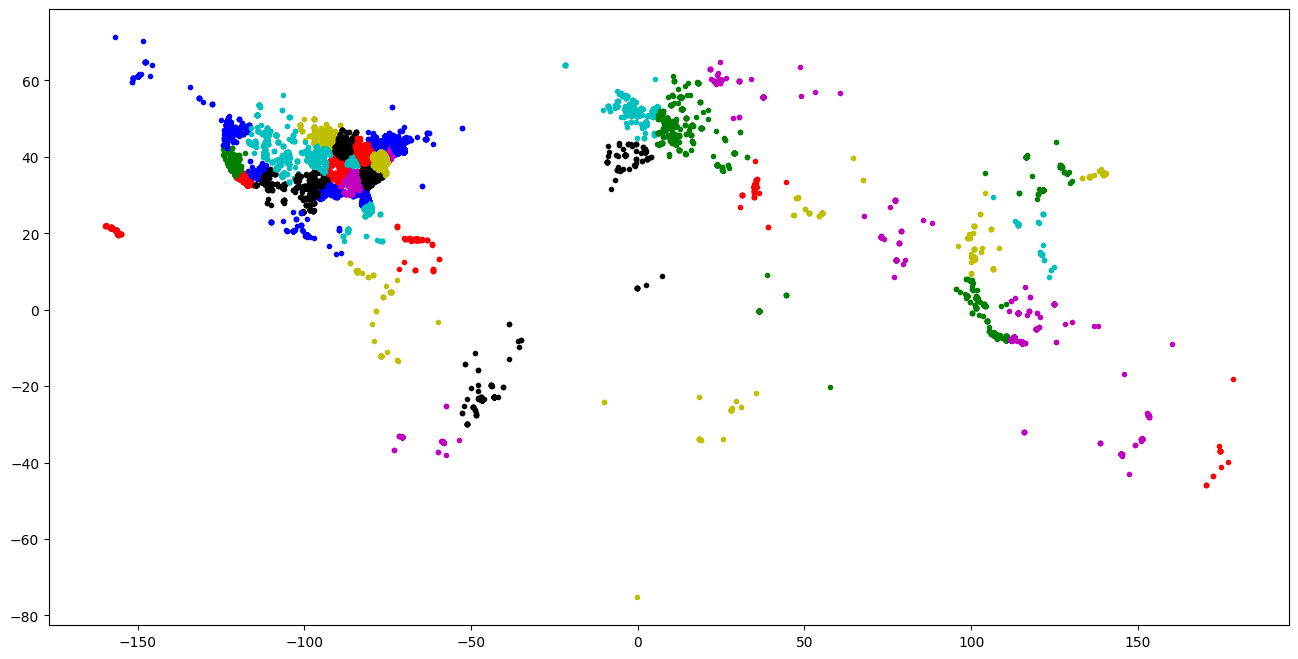

In [12]:
from itertools import cycle

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

plt.figure(figsize=(16,8))

# Будем перебирать все цвета внутри вот этого цикла
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    center = centers[k]

    # Каждый кластер наносим на график своим цветом
    plt.plot(X_adv[my_members,0],X_adv[my_members,1],col + '.' )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

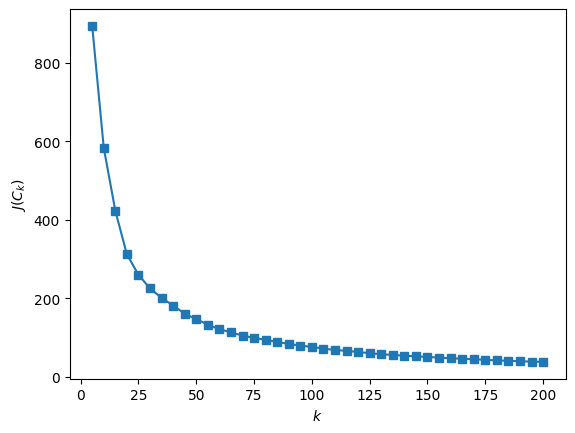

In [13]:
rg = range(5, 205, 5)
inertia = []

X_smpl = X_adv[:10000] # чтобы побыстрее отработало

for k in rg:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_smpl)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(rg, inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

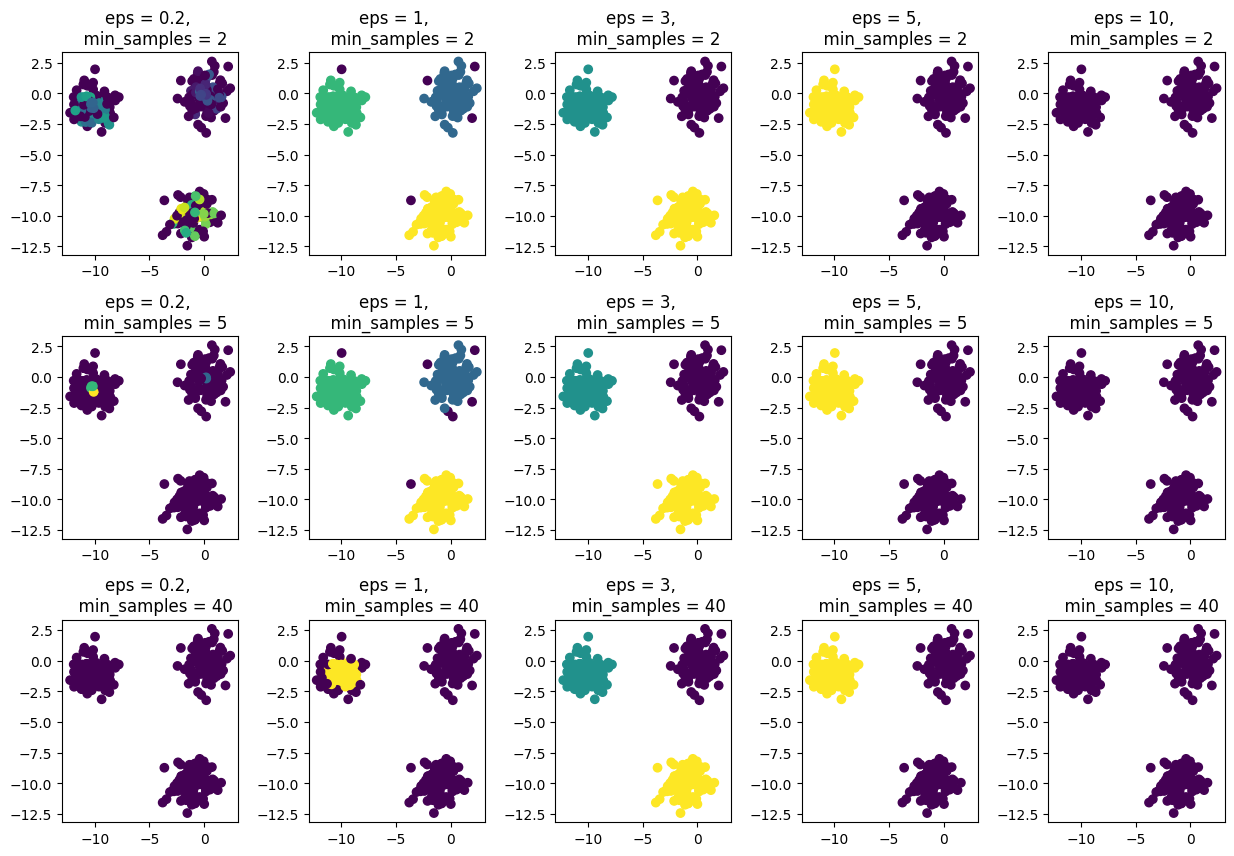

In [15]:
# Посмотрим на результаты кластеризации при разном выборе параметра eps и min_samples
# на нашем игрушечном примере

from sklearn.cluster import DBSCAN

smpl = [2, 5, 40]
eps = [0.2, 1, 3, 5, 10]

fig, axs = plt.subplots(len(smpl), len(eps), figsize=(15, 10))
fig.subplots_adjust(hspace = 0.4, wspace=0.4)

for i,samples in enumerate(smpl):
    for j,e in enumerate(eps):
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)

        axs[i, j].scatter(X[:,0], X[:,1], c = clusters)
        axs[i, j].set_title('eps = {}, \n  min_samples = {}'.format(e, samples))

In [16]:
# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]

while outlier_percentage > 0.1:
    model = DBSCAN(eps=eps).fit(X)

    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])

    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)

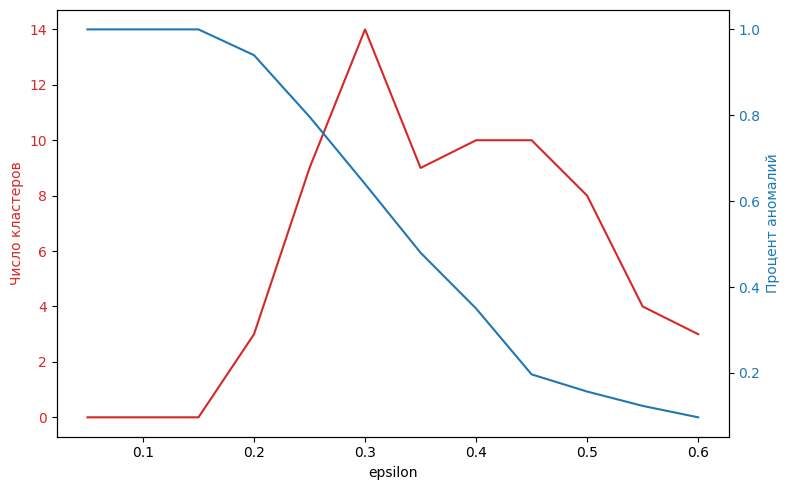

In [17]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots(figsize=(8,5))
color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('Число кластеров', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # инициализация второй оси в соотвествии с размером первой

color = 'tab:blue'
ax2.set_ylabel('Процент аномалий', color=color)
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [18]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.01, min_samples=10).fit(X_adv)

labels = clustering.labels_

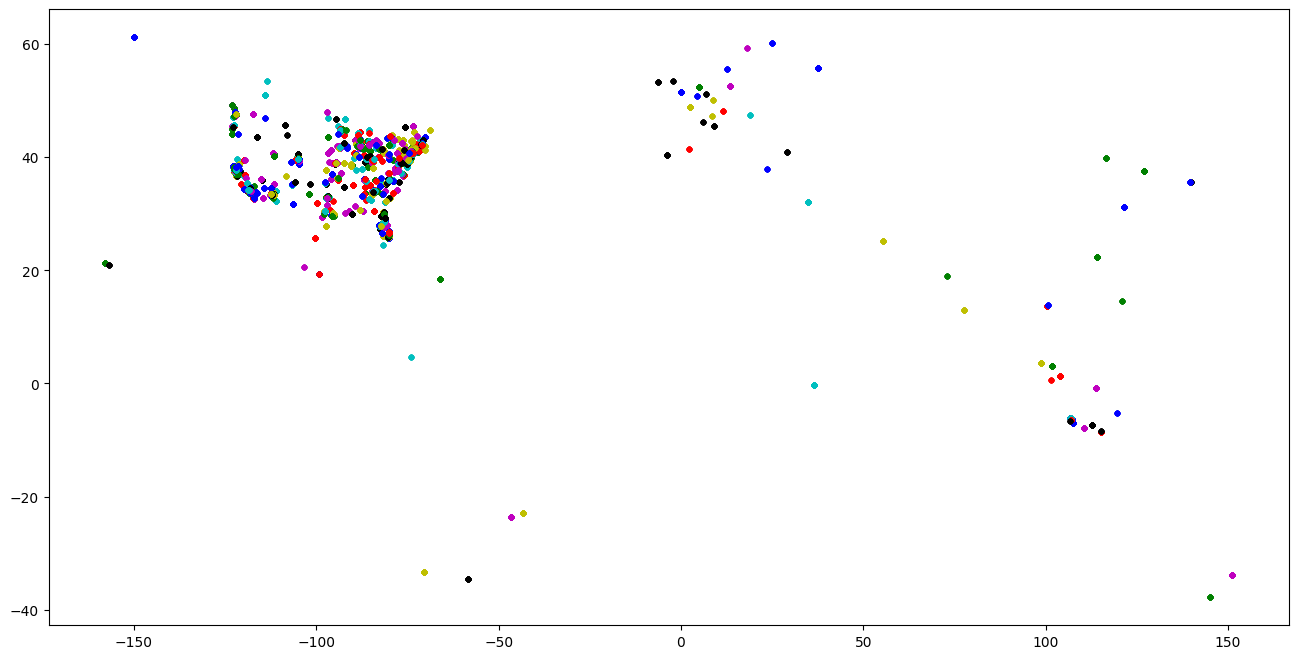

In [19]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

plt.figure(figsize=(16,8))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    plt.plot(X_adv[my_members,0],X_adv[my_members,1],col + '.' )

In [20]:
n_clusters_

1118

In [21]:
np.sum(labels == -1) # меткой -1 отмечаются шумовые точки

15011

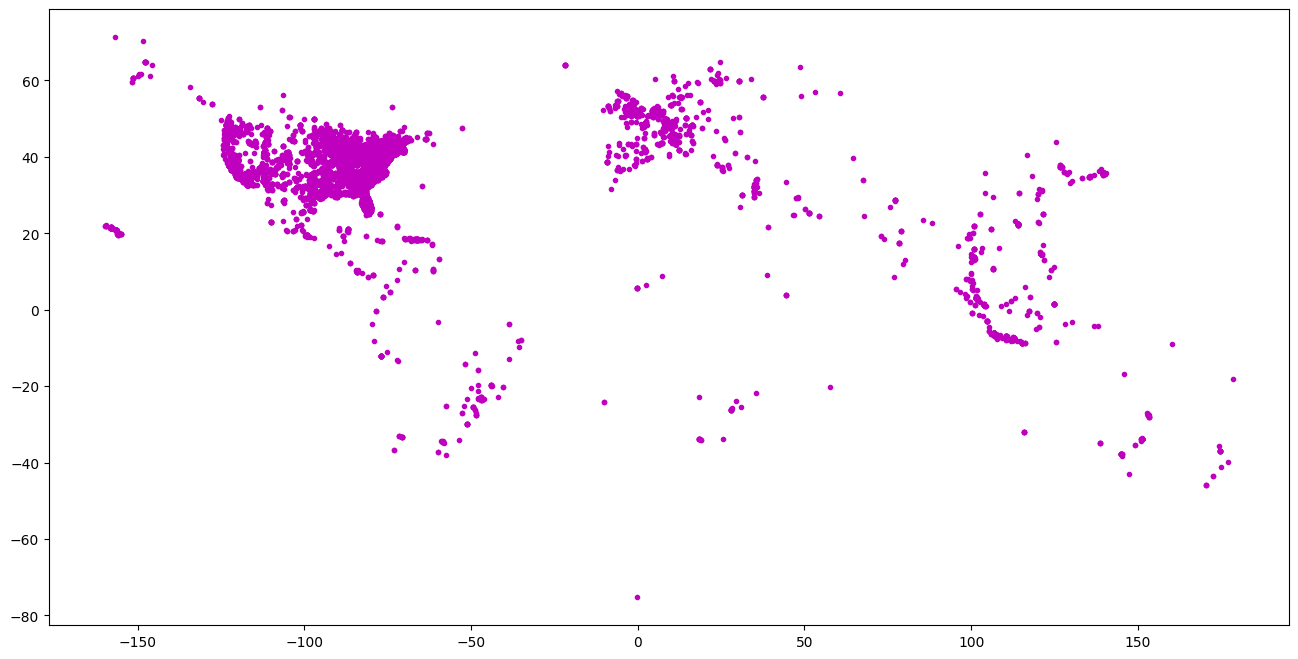

In [22]:
my_members = labels == -1

plt.figure(figsize=(16,8))
plt.plot(X_adv[my_members,0],X_adv[my_members,1],col + '.' )

In [23]:
# Посмотрим на размеры других кластеров
from collections import Counter
cnt = Counter(labels)
cnt.most_common()[:20]

[(-1, 15011),
 (0, 6025),
 (1, 4881),
 (38, 3861),
 (22, 2772),
 (7, 2074),
 (15, 1904),
 (21, 1516),
 (51, 1513),
 (41, 1219),
 (32, 1203),
 (193, 1128),
 (102, 1122),
 (14, 1113),
 (12, 1106),
 (76, 1064),
 (60, 1059),
 (18, 1046),
 (110, 972),
 (9, 965)]

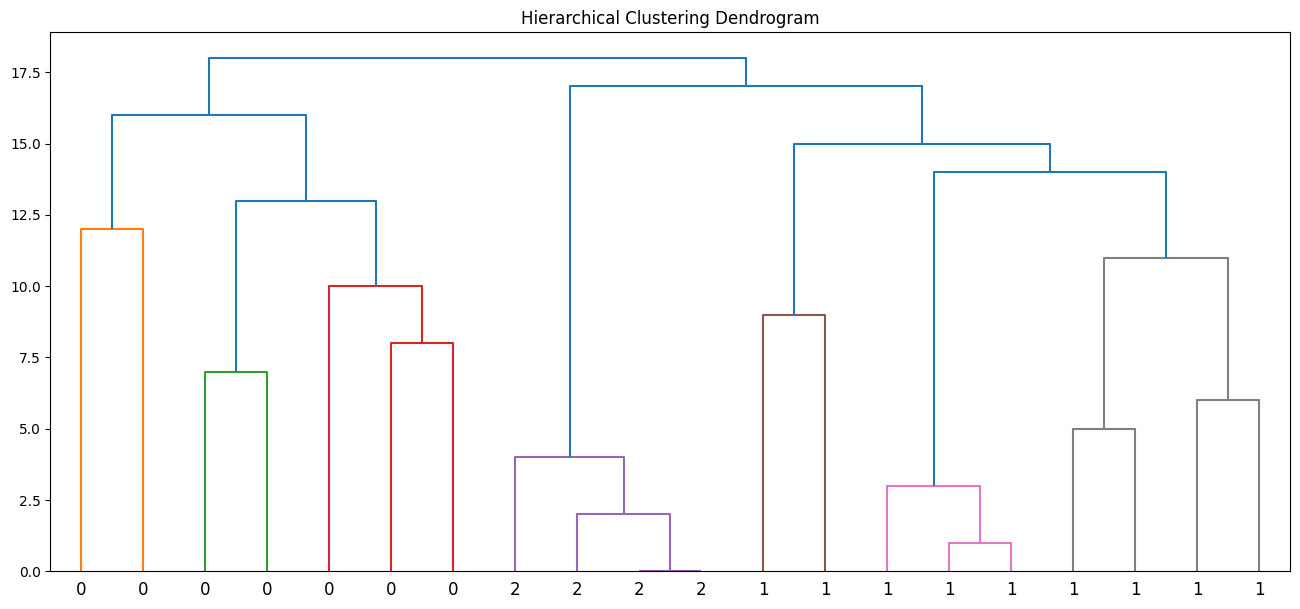

In [24]:
# Функция для строительства дендрограммы

from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data[:20]
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(X)
plt.figure(figsize=(16,7))
plot_dendrogram(model, labels=model.labels_)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

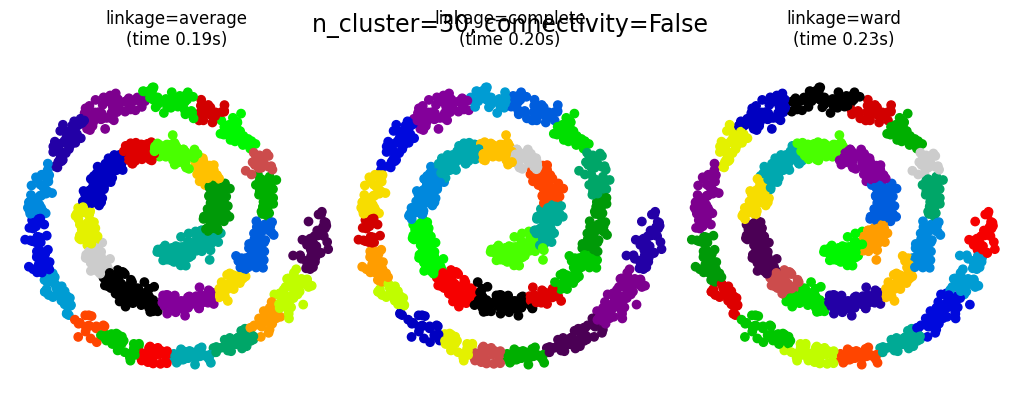

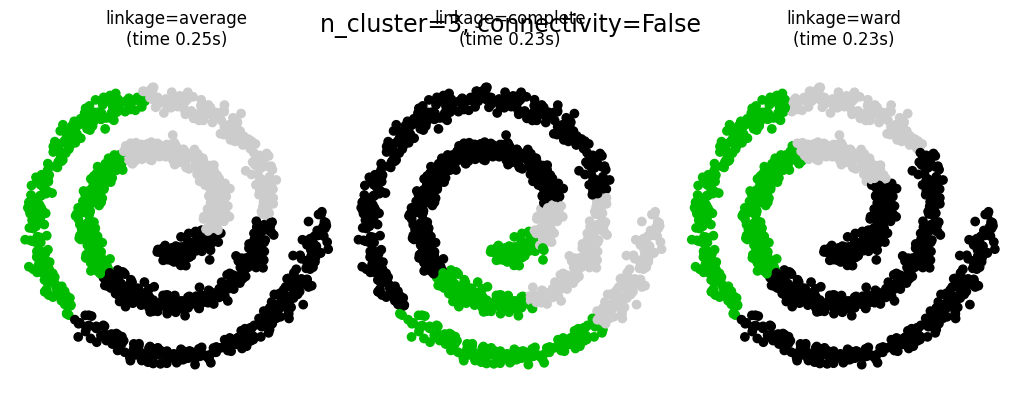

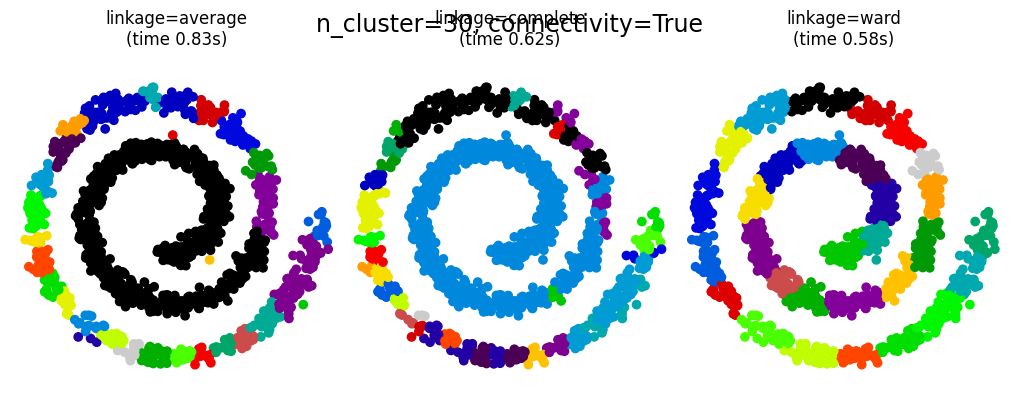

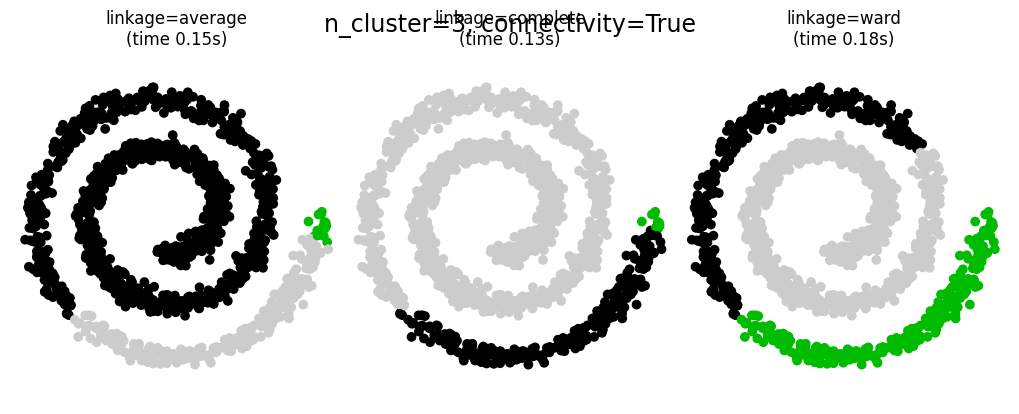

In [25]:
# Матрица связей

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X = np.concatenate((x, y))
X += .7 * np.random.randn(2, n_samples)
X = X.T

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        fig = plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s\n(time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)

plt.show()

Automatically created module for IPython interactive environment


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-26-b852c2a83df8>:115: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = algorithm.labels_.astype(np.int)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead


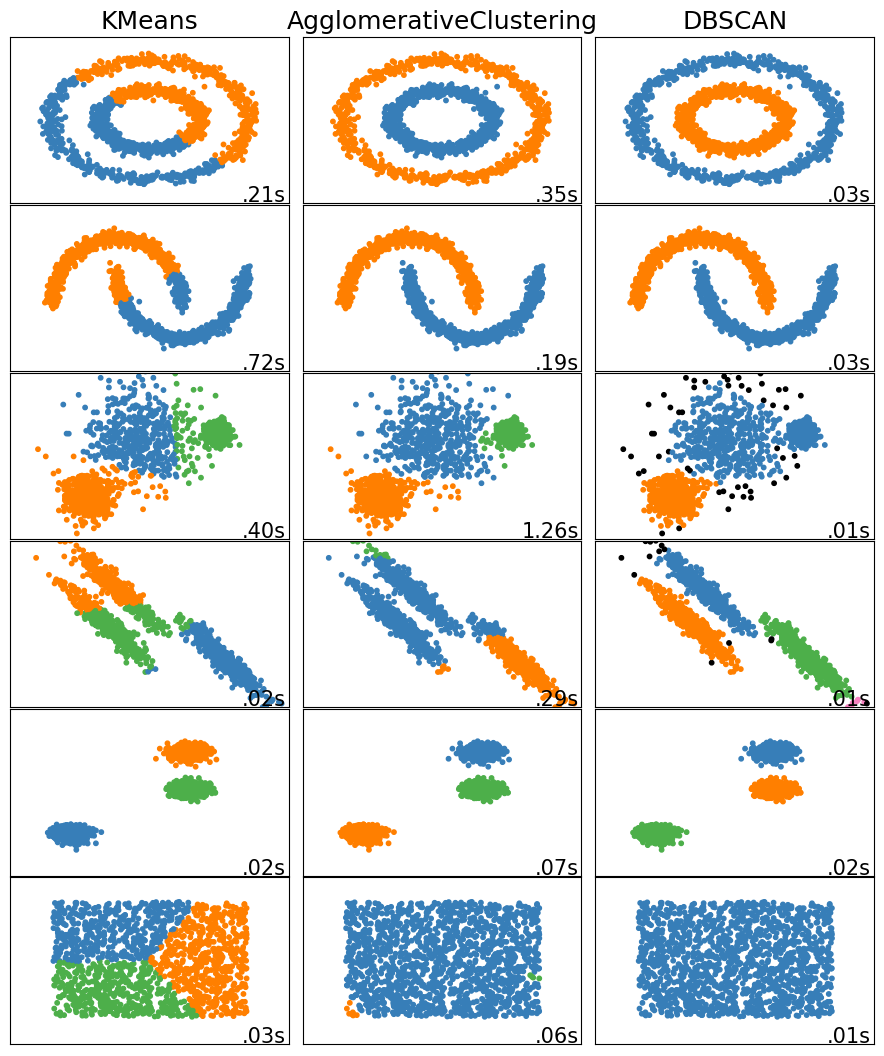

In [26]:
# Генерация кластеров разной формы алгоритмов
# Смотрим результаты работы алгоритмов

print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(3 * 2 + 3, 10.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)

    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============

    k_means = cluster.KMeans(n_clusters=params['n_clusters'])


    dbscan = cluster.DBSCAN(eps=params['eps'])

    average_linkage =  cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)


    clustering_algorithms = (
        ('KMeans', k_means),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [27]:
%%time
from sklearn import cluster
clt = cluster.MeanShift(bandwidth=0.01, bin_seeding=True, min_bin_freq=20)
clt.fit(X_adv)

CPU times: user 2.55 s, sys: 15.2 ms, total: 2.57 s
Wall time: 4.12 s


MeanShift(bandwidth=0.01, bin_seeding=True, min_bin_freq=20)

In [28]:
labels = clt.labels_
centers = clt.cluster_centers_

n_clusters_ = len(centers)
n_clusters_

557

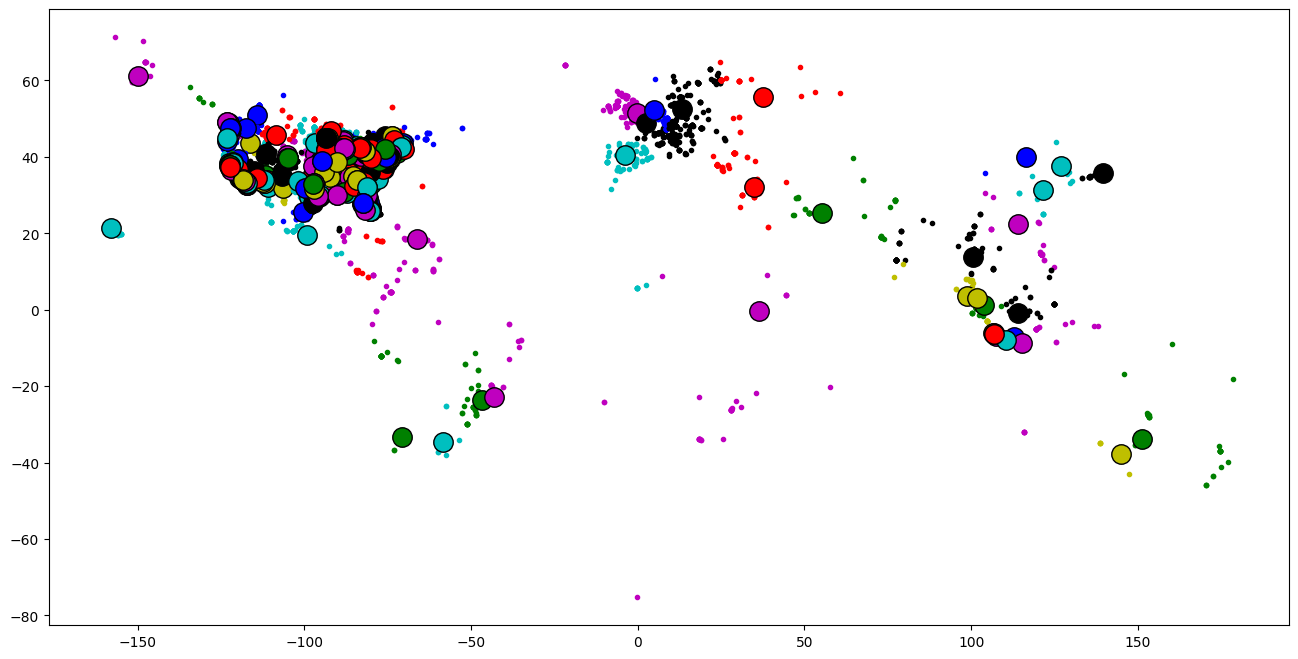

In [29]:
plt.figure(figsize=(16,8))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    center = centers[k]

    # Каждый кластер наносим на график своим цветом
    plt.plot(X_adv[my_members,0],X_adv[my_members,1],col + '.' )

    # Выделяем у кластеров центры
    plt.plot(center[0], center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)

In [30]:
results = [ ]
for item in offices:
    for jtem in centers:
        cur_rast = float(np.linalg.norm(jtem - item, ord=2))
        trio = (cur_rast, jtem, item)
        results.append(trio)

In [31]:
# всего у нас есть вот столько вариантов расположить рекламные щиты
len(results)

3342

In [32]:
results.sort()         # отсортировали по расстоянию
best_20 = results[:20] # взяли 20 самых близких
best_20[:5]

[(0.009415967371294666,
  array([ 4.89236247, 52.37292037]),
  array([ 4.885084, 52.378894])),
 (0.010291737013059684,
  array([151.21088987, -33.85992531]),
  array([151.205134, -33.868457])),
 (0.047114342000942666,
  array([-80.2781057,  25.8575963]),
  array([-80.324116,  25.867736])),
 (0.050885972156368656,
  array([-0.12629965, 51.50043856]),
  array([-0.075479, 51.503016])),
 (0.06110347702561974,
  array([-118.15814542,   33.8041694 ]),
  array([-118.18874 ,   33.751277]))]

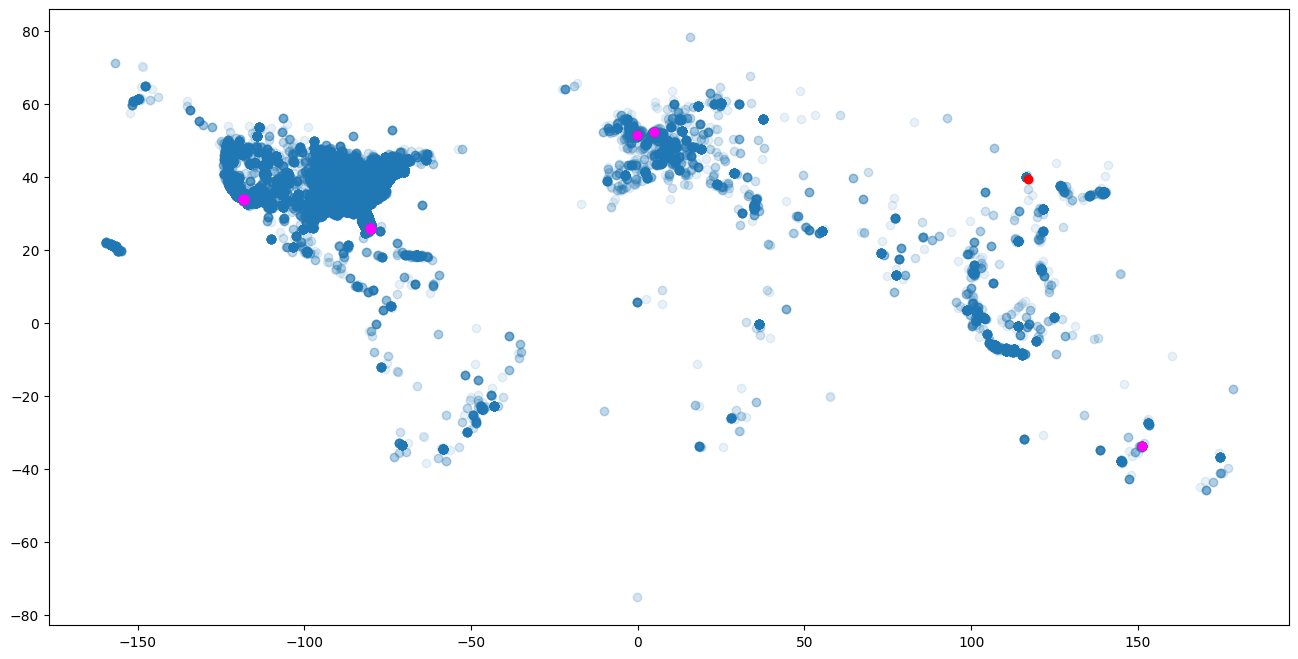

In [33]:
# Распакуем координаты для строительства картинки
coord = np.array([[item[1][0],item[1][1]] for item in best_20])

plt.figure(figsize=(16,8))
plt.scatter(df.longitude.values, df.latitude.values, alpha=0.1)  # Наносим все чекины
plt.scatter(offices[:,0], offices[:,1], color='red')             # Наносим офисы
plt.scatter(coord[:,0], coord[:,1], color='magenta')             # Наносим точки для рекламы

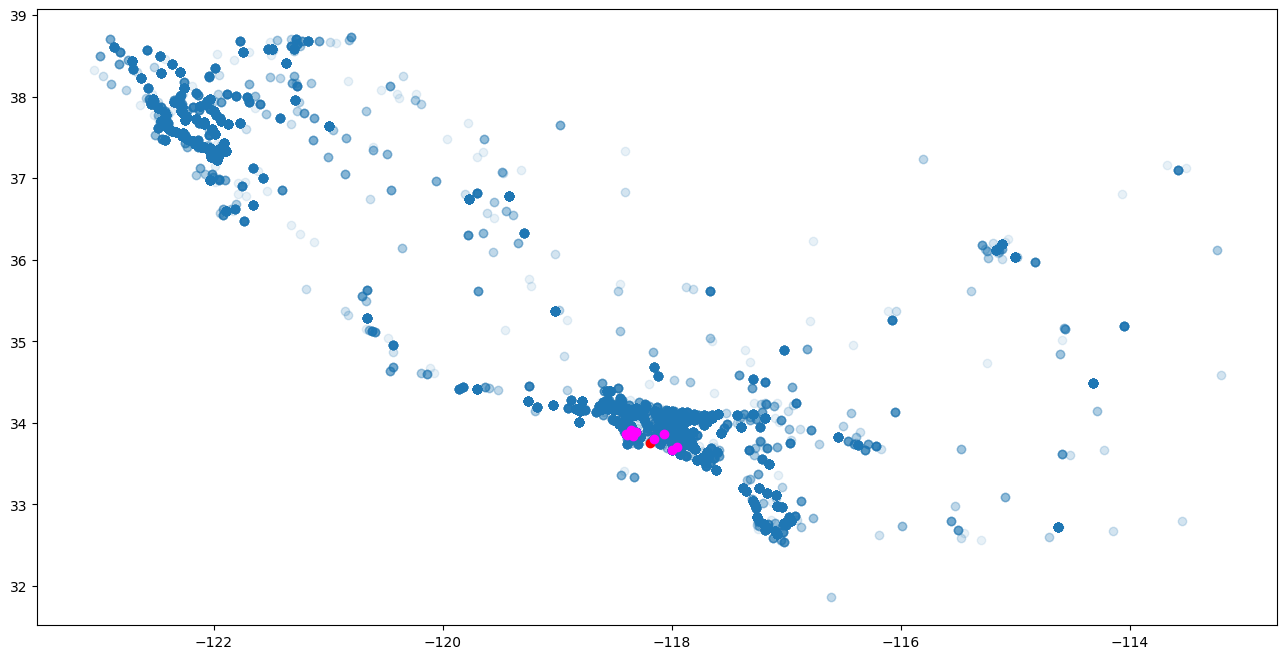

In [34]:
l = 5
с_long = offices[0][0]
c_lat = offices[0][1]

X_int = df[(df.longitude > с_long - l)&(df.longitude < с_long + l)&
          (df.latitude >  - l)&(df.latitude < c_lat + l)]

coord_int = coord[(coord[:,0] > с_long - l)&(coord[:,0] < с_long + l)&
                  (coord[:,1] > c_lat - l)&(coord[:,1] < c_lat + l)]

offices_int = offices[(offices[:,0] > с_long - l)&(offices[:,0] < с_long + l)&
                    (offices[:,1] > c_lat - l)&(offices[:,1] < c_lat + l)]

plt.figure(figsize=(16,8))
plt.scatter(X_int.longitude.values,X_int.latitude.values, alpha=0.1)  # Наносим все чекины
plt.scatter(offices_int[:,0], offices_int[:,1], color='red')          # Наносим офисы
plt.scatter(coord_int[:,0], coord_int[:,1], color='magenta')          # Наносим точки для рекламы